In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras

In [238]:
train_dir="sign_data_ver1/train/"
test_dir="sign_data_ver1/test/"

In [239]:
size = 224
        

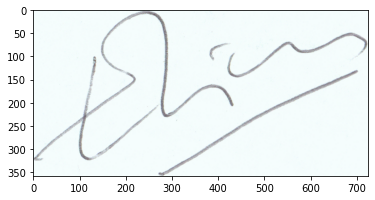

In [240]:
import matplotlib.pyplot as plt
img = plt.imread('sign_data_ver1/train/001/001_01.PNG')
plt.imshow(img)

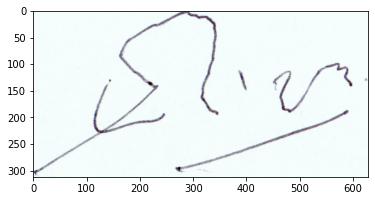

In [241]:
img1 = plt.imread('sign_data_ver1/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [267]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('sign_data_ver1/train/'):

    for data in glob.glob('sign_data_ver1/train/'+per+'/*.*'):
        img = cv2.imread(data,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('sign_data_ver1/test/'):
    for data in glob.glob('sign_data_ver1/test/'+per+'/*.*'):
        img = cv2.imread(data,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

[[array([[[253, 253, 245],
        [252, 252, 244],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       ...,

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 252, 244],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245

In [243]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [244]:
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [245]:
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [246]:
train_data.shape


(1649, 1, 224, 224, 3)

In [247]:
test_data.shape

(500, 1, 224, 224, 3)

In [248]:
train_data = train_data.reshape(-1, size,size, 3)
test_data = test_data.reshape(-1, size,size, 3)

train_data = np.asarray(train_labels).astype('float32').reshape((-1,1))
test_data = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [249]:
train_data.shape

(1649, 224, 224, 3)

In [250]:
test_data.shape

(500, 224, 224, 3)

In [251]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [252]:

# class MyModel(tf.keras.Model):

#   def __init__(self):
#     super(MyModel, self).__init__()
    
#     self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
#     self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
#     self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
#     self.flatten = tf.keras.layers.Flatten()
    
#     self.dense1 = tf.keras.layers.Dense(512, activation='relu')
#     self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

#   def call(self, inputs):
    
#     x = self.cnn1(inputs)
#     x = self.cnn2(x)
#     x = self.cnn3(x)
#     x = self.flatten(x)
#     x = self.dense1(x)
#     x = self.dense2(x)
    
#     return x

# model = MyModel()

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet'
                                               )
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

network = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.001
network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
network.summary()
              

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_18  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_20 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [253]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

EPOCHS = 5
BS = 1
progess = network.fit(train_data, train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
1566/1566 [==============================] - 66s 39ms/step - loss: 0.3864 - accuracy: 0.8186 - val_loss: 0.3335 - val_accuracy: 0.8554
Epoch 2/5
1566/1566 [==============================] - 59s 38ms/step - loss: 0.2131 - accuracy: 0.9183 - val_loss: 0.4083 - val_accuracy: 0.8675
Epoch 3/5
1566/1566 [==============================] - 57s 37ms/step - loss: 0.1697 - accuracy: 0.9355 - val_loss: 0.1574 - val_accuracy: 0.9639
Epoch 4/5
1566/1566 [==============================] - 57s 36ms/step - loss: 0.1464 - accuracy: 0.9425 - val_loss: 0.1943 - val_accuracy: 0.9157
Epoch 5/5
1566/1566 [==============================] - 57s 36ms/step - loss: 0.1360 - accuracy: 0.9464 - val_loss: 0.2594 - val_accuracy: 0.9157


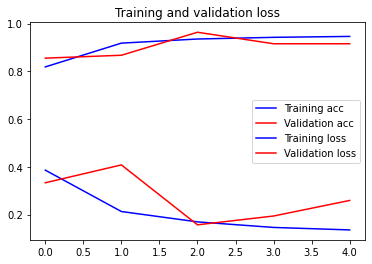

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [254]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [255]:
pred = network.predict(test_data)

16/16 [==============================] - 12s 701ms/step


In [258]:
pred  #prob of genuine, prob of forged

array([[ -4.877679  ,   5.4735384 ],
       [ -6.150314  ,   5.7641616 ],
       [  5.920817  ,  -4.990386  ],
       [  3.7799025 ,  -4.02661   ],
       [  4.8615527 ,  -4.849479  ],
       [  1.5549458 ,  -1.692143  ],
       [ -2.2245355 ,   2.0949175 ],
       [  2.3949068 ,  -2.593668  ],
       [ -2.7155511 ,   2.7467144 ],
       [  9.298902  , -10.14159   ],
       [ -1.5026889 ,   1.7304574 ],
       [  1.9547313 ,  -2.2326534 ],
       [ 13.346713  , -13.581417  ],
       [ -3.211169  ,   3.323369  ],
       [ -1.2663269 ,   1.2314475 ],
       [ -5.6583886 ,   6.26534   ],
       [ -4.905739  ,   4.0274982 ],
       [ -3.5013084 ,   3.7532425 ],
       [  1.9347842 ,  -2.2980442 ],
       [  1.9001707 ,  -1.8463053 ],
       [ -3.6279662 ,   3.6581407 ],
       [-10.617496  ,  10.342805  ],
       [  6.462587  ,  -6.9252195 ],
       [  7.4675174 ,  -6.8548303 ],
       [ 12.590723  , -11.5046215 ],
       [  0.9837028 ,  -0.79668677],
       [ -3.086842  ,   2.7033963 ],
 

In [257]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

16/16 [==============================] - 13s 717ms/step - loss: 0.1689 - accuracy: 0.9420
Test Accuracy: 0.9419999718666077
